Os seguintes scripts são uma versão Python do curso de Machine Learning do professor Andrew Ng da universidade de Stanford leccionado na plataforma Coursera.

**Nota: Todos os dados e estrutura do exercício pertencem à Universidade de Stanford**

**Ressalva:** Os scripts não estão implementados de forma modular para todas as funções serem consultadas no mesmo Jupyter Notebook - ao contrário da implementação Octave.

# Exercício 1 - Criar uma Matriz Identidade

In [1]:
# Importar o Numpy para manipular matrizes e vectores
import numpy as np
# Importar o pandas para ler os ficheiros
import pandas as pd
# Importar o Matplotlib para gráficos
import matplotlib.pyplot as plt

# Importar o toolkit de gráficos 3D
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

# Matplotlib propriedade inline
%matplotlib inline

O primeiro exercício consiste em crear uma matriz identidade de dimensão 5 por 5. Este exercício serve apenas para ganhar alguma familiaridade com o conceito de matriz.
<br>
As matrizes identidade são matrizes onde todos os elementos da diagonal principal são igual a 1 e os restantes elementos são igual a zero.
<br>
**As fórmulas dos slides do curso:**

<img src="assets/identity-matrix.png">

In [2]:
#Warm up exercise - Create a 5 by 5 identity matrix - Equivalent to Eye function in Octave

def exercicioTeste() -> np.array:
    A = np.identity(5)
    return A

In [3]:
# Chamar a matriz de identidade
print('Matriz Identidade 5 por 5: \n')
exercicioTeste()

Matriz Identidade 5 por 5: 



array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Exercício 2 - Gráfico dos Dados

O exercício consiste em visualizar os dados de um franchising de restaurantes. Este é um bom exemplo de uma tabela simples com duas variáveis que dizem respeito a uma empresa de restaurantes que tem diversos estabelecimentos por várias cidades.
<br>
Umas das tarefas mais comuns em ciência de dados é encontrar correlações entre as variáveis - para esta empresa, interessa-lhes ver se existe alguma relação directa entre o lucro de um restaurant e a população da cidade onde o mesmo se encontra.
<br>
<br>
No eixo do X temos a população (em milhares) e no eixo do Y temos o lucro (em milhares de $) para cada cidade. Cada cidade será mapeada com uma X vermelho.

In [4]:
# Ler o ficheiro de texto e criar as variáveis X e Y
ex1_file = pd.read_csv('ex1data1.txt', header=None) 
X = np.array(ex1_file.iloc[:,0])
y = np.array(ex1_file.iloc[:,1])


print('# exemplos de treino: {}'.format(len(X)))
m = len(X)

# exemplos de treino: 97


In [5]:
def graficoDados(
    X: np.array,
    y: np.array
) -> None:
    plt.scatter(X,y, marker='x', s=17, color='red')
    plt.xlabel('População')
    plt.ylabel('Lucro')
    plt.show()

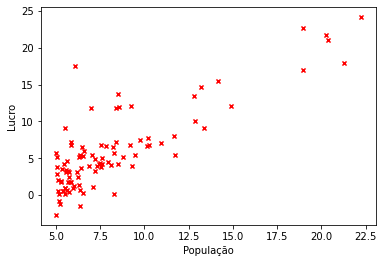

In [6]:
graficoDados(X,y)

Podemos ver, visualmente, que poderá existir alguma relação entre a população de uma cidade e o lucro feito por um restaurante nessa cidade. Porquê? Porque verificamos que poderá existir uma linha que seja capaz de prever o lucro com base na população já que quando existe mais população, o lucro do restaurante também têm tendência a ser maior.
<br>
<br>
Se o CEO da cadeia de retaurantes perguntasse: **Se eu abrir um  novo restaurante numa cidade com 150 mil pessoas, quanto de lucro devo esperar desse restaurante?**
<br>
<br>
Apenas pelo gráfico, poderíamos responder que a expectativa de lucro é de aproximadamente 120 mil dólares. 
<br>
Mas como cientista de dados, queremos responder a esta questão matematicamente e com precisão. Noutras palavras queremos encontrar a linha óptima que será capaz de prever o lucro de um restaurante dada uma cidade? **E como conseguimos encontrar essa linha?**
<br>
- Encontrando uma linha que minimiza a distância entre cada ponto e a linha - noutras palavras, a linha que minimiza o erro da nossa previsão!

# Exercício 3 - Função de Custo e Gradiente

Esta minimização pode ser encontrada com a minimização da função de custo. Essa função consiste no erro que queremos minimizar procurando uma função linear que o faça (manipulando o declive - Theta 0 e o a intercepção com o eixo Y - Theta 1).
<br>
**Conclusão - Queremos encontrar os thetas que produzem o valor mínimo de erro.**
<br>
<br>
De seguida, vamos calcular a função de custo para dois thetas arbitrários (0's em cada theta).
<br>
Para actualizar o valor dos thetas, vamos usar o gradiente descendente que nos irá levar cada vez mais perto do mínimo da função de custo / erro.

**Dos slides do Prof. Andrew:**

<img src="assets/cost_gradient.JPG">

In [7]:
# Adicionamos a coluna de "uns" que funciona como valor do eixo 
# A partir daqui vamos chamar o object X_ext que contém os valores da variável mais os valores do eixo
X_ext = np.array([np.ones(len(X)),X])
theta = np.zeros((2,1))

# Definição de parâmetros do gradiente descendente
iteracoes = 1500
alpha = 0.01

In [8]:
# Cálculo da função de custo

def calculoCusto(
    X: np.array,
    y: np.array,
    theta: np.array
) -> int:
    m = X.shape[1]
    hipotese = np.dot(np.transpose(X),theta)
    # Calcular a função de custo usando a soma dos quadrados
    J = (1/(2*m)) * sum(((hipotese-y.reshape(len(y),1))**2))
    return J

In [9]:
J = calculoCusto(X_ext,y,theta)

In [10]:
print('Com um theta [0,0] \n a função de custo calculada é = {}'.format(float(J)))

Com um theta [0,0] 
 a função de custo calculada é = 32.072733877455654


**Usando este theta arbirtário (Theta0 = 0 e Theta1 =0) temos um erro médio de 32.07.**

In [11]:
# Podemos testar a função de custo com outro theta
J = calculoCusto(X_ext, y, np.array((-1,2)).reshape(2,1))

print('Com um theta [-1,2] \n o custo calculado é = {}'.format(float(J)))

Com um theta [-1,2] 
 o custo calculado é = 54.24245508201238


**Com um theta0 de -1 e um Theta1 de 2 temos um erro médio superior, 54.24 - logo esta recta tem menos qualidade de previsão que a solução com os thetas (0,0)**

**Usando o theta inicial de Theta0 = 0 e Theta1 = 0 como ponto de partido, como podemos optimizar a função de custo?**
**Como fazemos isto? Calculando a derivada de J / Função de Custo / erro orientada aos thetas - queremos mover o valor de thetas de modo a minimizar a função J.**

In [14]:
# Definir o gradiente descendente:

def gradienteDescendente(
    X: np.array,
    y: np.array,
    theta: np.array,
    alpha: float,
    iteracoes: int
):
    m = X.shape[1]
    # J_historico é um objecto que guarda a função de custo para cada iteração
    # do gradiente descendente
    J_historico = np.zeros((iteracoes,1))
    
    # Iterar por cada elemento e calcular a função de custo e gradiente
    for i in np.arange(0,iteracoes):
        # Calcular hipótese para o theta 
        hipotese = np.dot(np.transpose(X),theta)
        # Calcular o gradiente referente a theta
        theta -= (alpha * (1/m) * np.dot(X,(hipotese-y.reshape(len(y),1))))
        J_historico[i] = calculoCusto(X,y,theta)
    
    return theta, J_historico

In [15]:
# Correr o gradiente descendente por 1500 iterações e usando um rácio de aprendizagem de 0.01
iteracoes = 1500
alpha = 0.01

theta, J_history = gradienteDescendente(X_ext, y, np.zeros((2,1)), alpha, iteracoes)

In [16]:
print('O theta produzido depois de correr o gradiente descendente é {}'.format(theta))

O theta produzido depois de correr o gradiente descendente é [[-3.63029144]
 [ 1.16636235]]


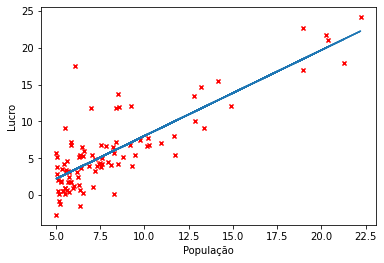

In [17]:
# O gráfico abaixo mostra a linha gerada pelos thetas resultantes do gradiente descendente
plt.plot(X_ext[1,:],(np.dot(theta.T,X_ext).reshape(X_ext.shape[1])))
graficoDados(X,y)

Qual é o valor do erro produzido pela linha que conseguimos encontrar acima?

In [18]:
print('A nossa função de custo para a última iteração do gradiente descendente é de {}'.format(
    J_history[-1][0]))

A nossa função de custo para a última iteração do gradiente descendente é de 4.483388256587727


**Um valor muito mais baixo de erro quando comparamos com o nosso theta inicial de [0,0].**

Podemos usar esta linha para prever o lucro para restaurantes em cidades com diferentes números de populações.

In [19]:
# Prever valores de lucro para diferentes valores da população

def prever(
    size:float
):
    try:
        previsao = np.dot(np.array([1,size]),theta)
        print ('Para uma população de {}, prevemos um lucro de {} dólares'.format(float(size)*10000, round(float(previsao*10000),2)))
    except ValueError: 
        raise('Ups! Não é um número.')

In [20]:
# Prever o lucro para uma população de 35000
prever(3.5)

# Prever o lucro para uma população de 80000
prever(8)

Para uma população de 35000.0, prevemos um lucro de 4519.77 dólares
Para uma população de 80000.0, prevemos um lucro de 57006.07 dólares


# Exercise 4 - Visualizar a função de custo de acordo com várias combinações de Thetas

O último exercício permite-nos visualizar toda a região da função de custo de acordo com diferentes thetas - temos diferentes J's à escolha de acordo com o conjunto de thetas que definimos - esta área será visualizada num gráfico 3D abaixo.

In [21]:
# Criar uma matriz de diversos thetas para visualizar o comportamento da função de custo 
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

In [22]:
# Criar o objecto que irá receber os diversos valores de theta
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [23]:
for i in np.arange(len(theta0_vals)):
    for j in np.arange(len(theta1_vals)):
        t = np.array((theta0_vals[i],theta1_vals[j])).reshape(2,1)
        J_vals[i,j] = calculoCusto(X_ext,y,t)

Visualizar a função de custo para diferentes thetas ajuda-nos a compreender o potencial de minimização da função - a zona onde iremos obter menos erro com a nossa previsão.
<br> 
<br>
O que o gradiente descendente faz é descer ao longo das colina até chegar a um ponto mínimo **(sendo a expectativa que chegue a um mínimo local):**

Vamos visualizar esta área num gráfico 3D e num gráfico de contornos.

Text(0.5, 0, 'Função de custo')

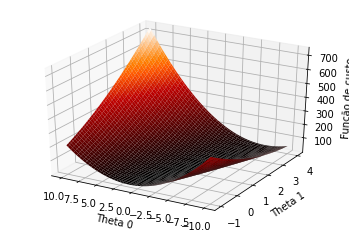

In [24]:
# Matriz de valores para theta0 and theta1 
X_Grid, Y_Grid = np.meshgrid(theta0_vals, theta1_vals)

# Cirar o gráfico de área com as diferenças funções de custo para cada valor de theta 0 e theta 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_Grid, Y_Grid, J_vals , cmap=cm.gist_heat)
ax.invert_xaxis()
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Função de custo')

Text(0, 0.5, 'Theta 1')

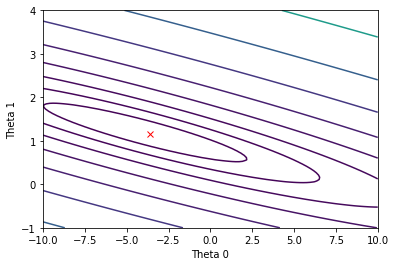

In [25]:
# Podemos visualizar isto em 2-D com um gráfico de contornos
plt.contour(X_Grid, Y_Grid, J_vals.T, np.logspace(-2, 3, 20))
# Podemos também marcar com um X o valor de thetas que minimiza a função de Custo
# A função de custo é minimizada nos valores em que Theta 1 é ~ 1 e Theta 0 ~ -4
# A zona marcada é a zona onde os nossos thetas conseguem prever o lucro 
# com base na população com o menor erro
plt.plot(theta[0], theta[1], marker='x', color = 'red')
plt.xlabel('Theta 0') 
plt.ylabel('Theta 1')

A cruz vermelha indica o ponto específico em que o valor da função de custo é minimizada relativamente aos parâmetros Theta 0 e Theta 1. Neste example, mesmo que começemos o nosso gradiente descendente num ponto arbitrário desta região, podemos estar confiantes que o gradiente descendente irá encontrar o mínimo da função depois de algumas iterações. Isto acontence porque a "paisagem" da função de custo não parece apresentar mínimos locais e parece ter apenas um mínimo global. Não existe hipótese do algoritmo ficar "preso" num mínimo local, existindo outra combinação de theta's que permita obter um erro menor.